In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from scipy.fftpack import fft, ifft

import sys
sys.path.append("../library-Git/")
from defaultPlot import *
from stringFormat import *
from parameters import *
from readData import read, readt_a, readt_c

# Read Data

In [2]:
clusterSizeDist = {}
clusterSizeDist_exact = {}
clusterSizeDist_time = {}
meanClusterSize = {}
meanClusterSize_trial = {}
orderParameter = {}
orderParameter_trial = {}
t_inflection={}
m_inflection={}
t_a = {}
m_a = {}
t_c_var = {}
m_c_var = {}
t_c_mcs = {}
m_c_mcs = {}
time = {}
orderParameterVariance = {}
orderParameterVariance_trial = {}



In [3]:
acceptanceThreshold = 0.2
for networkSize in networkSizeList:
    deltaT = 1/networkSize
    time[networkSize] = np.arange(0, 1, deltaT)
    for acceptanceThreshold in acceptanceThresholdList[:-1]:
        orderParameter[networkSize, acceptanceThreshold] = read("orderParameter", networkSize, acceptanceThreshold)
        # t_inflection[networkSize, acceptanceThreshold], m_inflection[networkSize, acceptanceThreshold], t_a[networkSize, acceptanceThreshold], m_a[networkSize, acceptanceThreshold] = readt_a(networkSize, acceptanceThreshold)
        # t_c_var[networkSize, acceptanceThreshold], m_c_var[networkSize, acceptanceThreshold], t_c_mcs[networkSize, acceptanceThreshold], m_c_mcs[networkSize, acceptanceThreshold] = readt_c(networkSize, acceptanceThreshold) 
        meanClusterSize[networkSize, acceptanceThreshold] = read("meanClusterSize", networkSize, acceptanceThreshold)
        orderParameterVariance[networkSize, acceptanceThreshold] = read("orderParameterVariance", networkSize, acceptanceThreshold)
        
        # trialTime[networkSize, acceptanceThreshold] = np.arange(0, len(orderParameter[networkSize, acceptanceThreshod])/networkSize, 1/networkSize)
        # orderParameter_trial[networkSize, acceptanceThreshold] = read("orderParameter_trial", networkSize, acceptanceThreshold)
        # meanClusterSize_trial[networkSize, acceptanceThreshold] = read("meanClusterSize_trial", networkSize, acceptanceThreshold)
        # orderParameterVariance_trial[networkSize, acceptanceThreshold] = read("orderParameterVariance_trial", networkSize, acceptanceThreshold)
        
        # for op in orderParameter_clusterSizeDist[acceptanceThreshold]:
        #     clusterSizeDist[networkSize, acceptanceThreshold, op] = read("clusterSizeDist", networkSize, acceptanceThreshold, op)
        #     clusterSizeDist_exact[networkSize, acceptanceThreshold, op] = read("clusterSizeDist_exact", networkSize, acceptanceThreshold, op)
        # for t in time_clusterSizeDist[acceptanceThreshold]:
        #     clusterSizeDist_time[networkSize, acceptanceThreshold, t] = read("clusterSizeDist_time", networkSize, acceptanceThreshold, t)

# Plot zoomed order parameter and maximum slope

N= 10000.0  t_a: 0.9298
N= 20000.0  t_a: 0.93175
N= 40000.0  t_a: 0.9329
N= 80000.0  t_a: 0.9335875
N= 160000.0  t_a: 0.9339875
N= 320000.0  t_a: 0.9342375
N= 640000.0  t_a: 0.934421875
N= 1280000.0  t_a: 0.9346203125
N= 2560000.0  t_a: 0.934908203125
N= 5120000.0  t_a: 0.935280859375
N= 10240000.0  t_a: 0.93616005859375


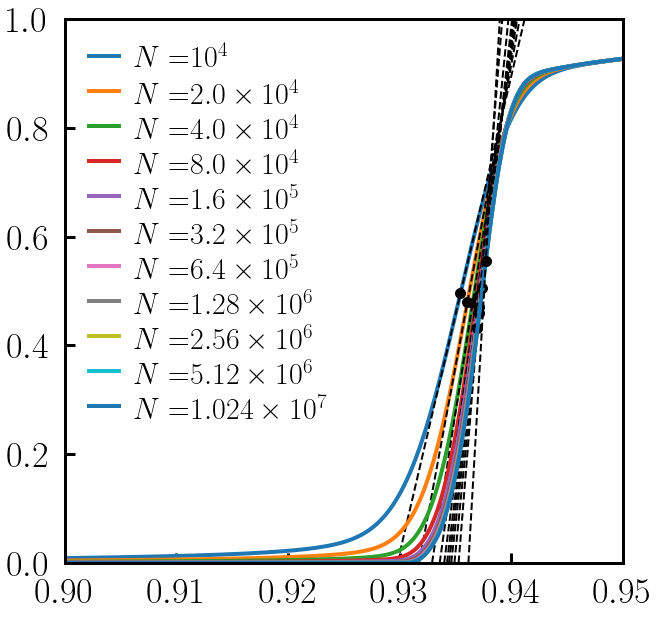

In [4]:
_, ax = plt.subplots(figsize = (10,10))

acceptanceThreshold = 0.5
xlim = [0.9, 0.95]
ylim = [0,1]
for networkSize in networkSizeList:
    start = int(xlim[0] * networkSize)
    end = int(xlim[1] * networkSize)
    op = orderParameter[networkSize, acceptanceThreshold][start:end]
    t = time[networkSize][start:end]
    ax.plot(t, op, label = latexString("N=") + latexSci(networkSize))
    
    inflectionTime, inflectionOP, t_a = inflection[networkSize, acceptanceThreshold]
    ax.plot(inflectionTime, inflectionOP, 'ko', markersize = 10)
    ax.plot([t_a, t_a+(inflectionTime - t_a)/inflectionOP], [0, 1], 'k--', linewidth = 2)
    print("N=",networkSize," t_a:", t_a)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend(loc = "upper left", fontsize = 30)

plt.show()

# Plot Variance of order parameter

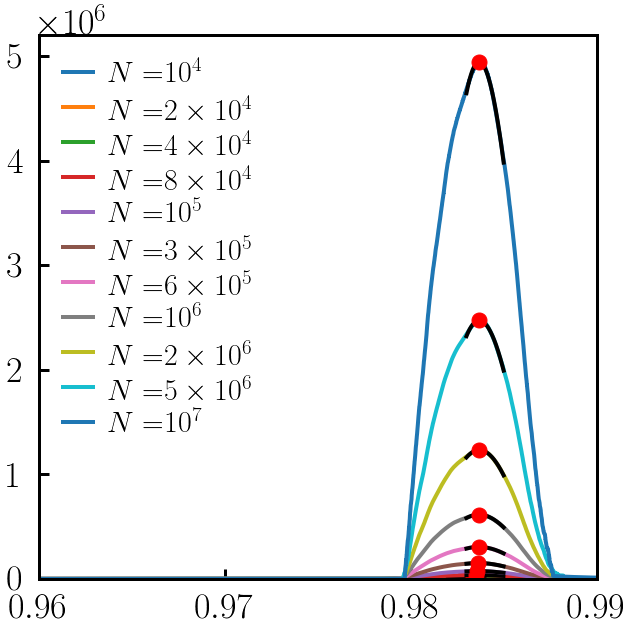

In [12]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.3

xlim = plot_lim[acceptanceThreshold, 1e4]
# xlim_fit = [0.983,0.985]


for networkSize in networkSizeList[:]:
    xlim_fit = fit_lim[acceptanceThreshold, networkSize]
    plot_index = int(xlim[0] * networkSize),int(xlim[1] * networkSize)
    fit_index = int(xlim_fit[0] * networkSize), int(xlim_fit[1] * networkSize)
    opv = orderParameterVariance[networkSize, acceptanceThreshold]
    t = time[networkSize]
    ax.plot(t[plot_index[0]:plot_index[1]], opv[plot_index[0]:plot_index[1]], label = latexString("N=") + latexSci(networkSize))
    
    fit_poly = np.polyfit(t[fit_index[0]:fit_index[1]], opv[fit_index[0]:fit_index[1]], 3)
    fit_poly = np.poly1d(fit_poly)
    ax.plot(t[fit_index[0]:fit_index[1]], fit_poly(t[fit_index[0]:fit_index[1]]), 'k-')
    max_index = np.argmax(fit_poly(t[fit_index[0]:fit_index[1]]))
    t_c = t[fit_index[0]+max_index]    
    m_c = orderParameter[networkSize, acceptanceThreshold][fit_index[0]+max_index]
    ax.plot(t_c, fit_poly(t_c), 'ro')

    # with open("../data/mBFW_hybrid/t_c.txt",'a') as file:
    #     file.write("N{:.1e},G{:.1f}".format(networkSize, acceptanceThreshold)+"\tt_c_var:"+str(t_c)+", m_c:"+str(m_c)+"\n")

ax.set_xlim(xlim)
ax.set_ylim(bottom = 0)
ax.legend(loc = "upper left", fontsize = 30)


plt.show()


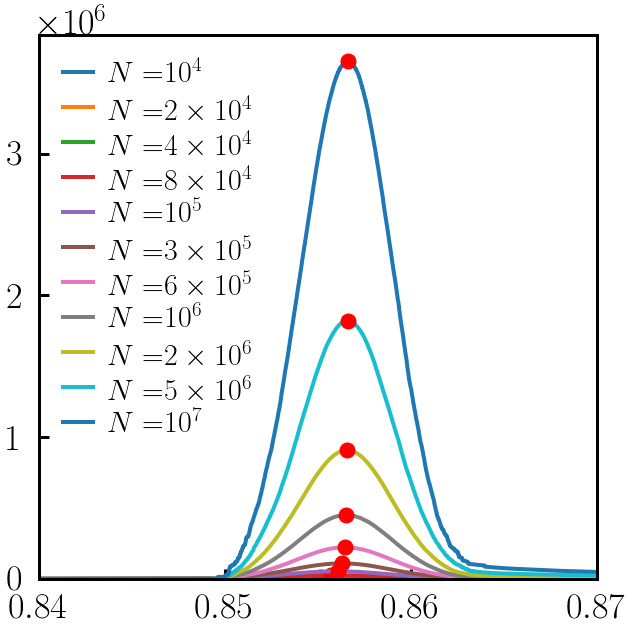

In [28]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.7


# xlim = plot_lim[acceptanceThreshold]
xlim = [0.84, 0.87]    

for networkSize in networkSizeList:
    plot_index = int(xlim[0] * networkSize),int(xlim[1] * networkSize)
    fit_index = int(xlim_fit[0] * networkSize), int(xlim_fit[1] * networkSize)
    opv = orderParameterVariance[networkSize, acceptanceThreshold]
    t = time[networkSize]
    ax.plot(t[plot_index[0]:plot_index[1]], opv[plot_index[0]:plot_index[1]], label = latexString("N=") + latexSci(networkSize))

    ax.plot(t_c_var[networkSize, acceptanceThreshold], opv[int(networkSize*t_c_var[networkSize, acceptanceThreshold])], 'ro')

ax.set_xlim(xlim)
ax.set_ylim(bottom = 0)
ax.legend(loc = "upper left", fontsize = 30)


plt.show()


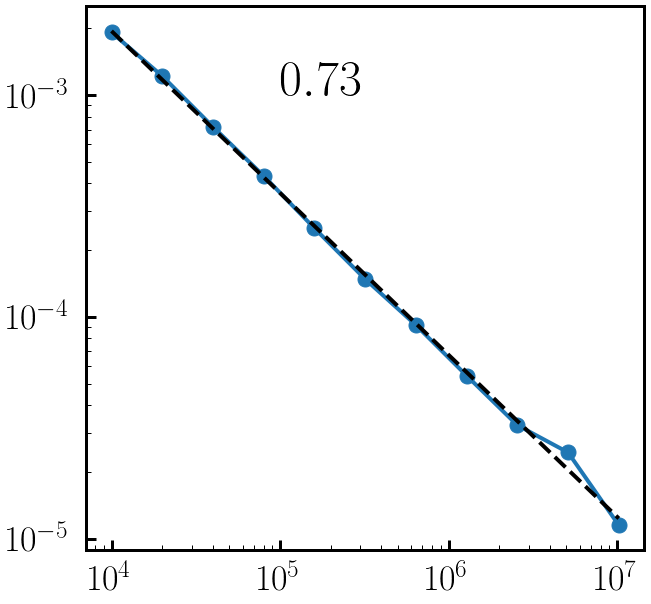

In [11]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.5

x = networkSizeList
y = []
for networkSize in networkSizeList:
    y.append(t_c_inf[acceptanceThreshold]-t_c[networkSize, acceptanceThreshold][0])

ax.plot(x,y ,'o-')


fitX, fitY, tau, residual = logFit(x,y, offset=0)
ax.plot(fitX, fitY, 'k--')
# print(tau, residual)
ax.text(1e5,1e-3, latexFloat(-1*tau,2), fontsize=50)


ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

# Plot mean cluster size

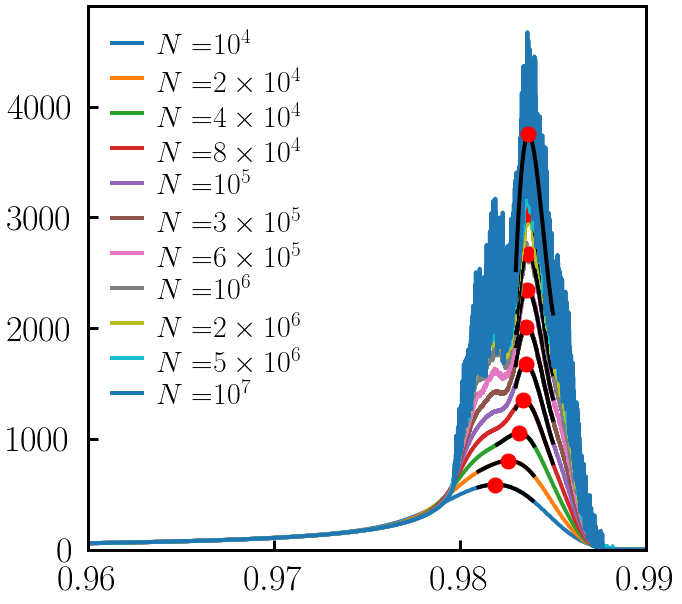

In [14]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.3

xlim = plot_lim[acceptanceThreshold, 1e4]
# xlim_fit = [0.8535, 0.8565]


for networkSize in networkSizeList[:]:
    xlim_fit = fit_lim[acceptanceThreshold, networkSize]
    plot_index = int(xlim[0] * networkSize),int(xlim[1] * networkSize)
    fit_index = int(xlim_fit[0] * networkSize), int(xlim_fit[1] * networkSize)
    mcs = meanClusterSize[networkSize, acceptanceThreshold]
    t = time[networkSize]
    ax.plot(t[plot_index[0]:plot_index[1]], mcs[plot_index[0]:plot_index[1]], label = latexString("N=") + latexSci(networkSize))

    fit_poly = np.polyfit(t[fit_index[0]:fit_index[1]], mcs[fit_index[0]:fit_index[1]], 3)
    fit_poly = np.poly1d(fit_poly)
    ax.plot(t[fit_index[0]:fit_index[1]], fit_poly(t[fit_index[0]:fit_index[1]]), 'k-')
    max_index = np.argmax(fit_poly(t[fit_index[0]:fit_index[1]]))
    t_c = t[fit_index[0]+max_index]    
    m_c = orderParameter[networkSize, acceptanceThreshold][fit_index[0]+max_index]
    ax.plot(t_c, fit_poly(t_c), 'ro')

    with open("../data/mBFW_hybrid/t_c.txt",'a') as file:
        file.write("N{:.1e},G{:.1f}".format(networkSize, acceptanceThreshold)+"\tt_c_mcs:"+str(t_c)+", m_c:"+str(m_c)+"\n")

ax.set_xlim(xlim)
ax.set_ylim(bottom = 0)
ax.legend(loc = "upper left", fontsize = 30)


plt.show()


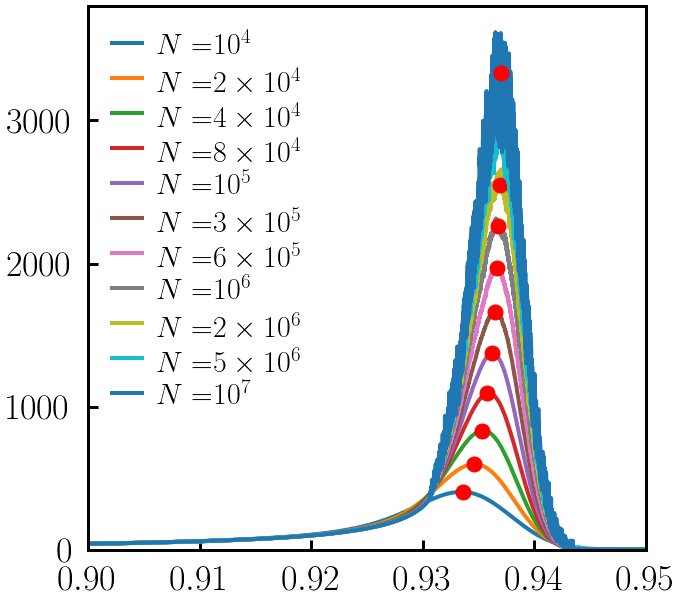

In [16]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.5


t_c_mcs = {}
xlim = [0.9, 0.95]
xlim_fit = [0.9335,0.939]

for networkSize in networkSizeList:
    plot_index = int(xlim[0] * networkSize),int(xlim[1] * networkSize)
    fit_index = int(xlim_fit[0] * networkSize), int(xlim_fit[1] * networkSize)
    mcs = meanClusterSize[networkSize, acceptanceThreshold]
    t = time[networkSize]
    ax.plot(t[plot_index[0]:plot_index[1]], mcs[plot_index[0]:plot_index[1]], label = latexString("N=") + latexSci(networkSize))
    ax.plot(t_c[networkSize, acceptanceThreshold][2], mcs[int(networkSize*t_c[networkSize, acceptanceThreshold][2])], 'ro')


ax.set_xlim(xlim)
ax.set_ylim(bottom = 0)
ax.legend(loc = "upper left", fontsize = 30)


plt.show()


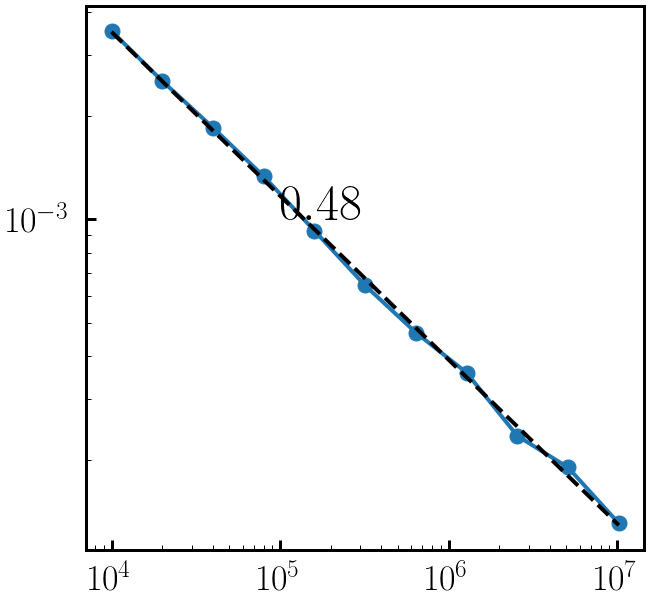

In [17]:
_, ax = plt.subplots(figsize = (10,10))
acceptanceThreshold = 0.5

x = networkSizeList
y = []
for networkSize in networkSizeList:
    y.append(0.93712-t_c[networkSize, acceptanceThreshold][2])

ax.plot(x,y ,'o-')


fitX, fitY, tau, residual = logFit(x,y, offset=0)
ax.plot(fitX, fitY, 'k--')
# print(tau, residual)
ax.text(1e5,1e-3, latexFloat(-1*tau,2), fontsize=50)


ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

# Cluster Size Distribution according to order parameter

0.8 -2.090134747676318 0.009887187559275885
0.81 -2.1501556938195803 0.014132878241116009
0.82 -2.236400780038835 0.027238406283630116


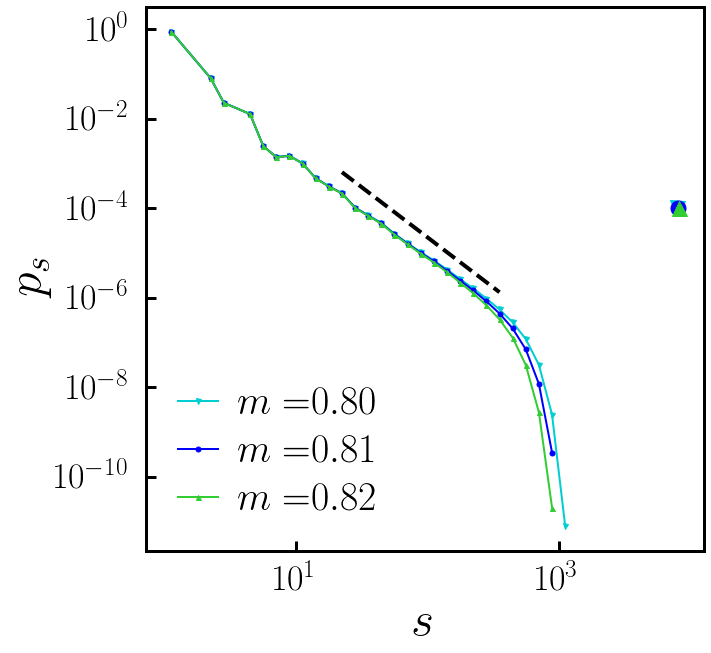

In [131]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10000
acceptanceThreshold = 0.5
fitRange = clusterSizeDist_fitRange[networkSize, acceptanceThreshold]
fitRange = [10, 23]

# default plot
op = 0.8
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2), markersize = 5, linewidth = 2)
ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
print(op, tau, residual[0])

op = 0.81
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2), markersize = 5, linewidth = 2)
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
print(op, tau, residual[0])

op = 0.82
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2), markersize = 5, linewidth = 2)
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
print(op, tau, residual[0])
ax.plot(fitX, fitY, 'k--')

# op = 0.83
# cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
# ax.plot(cs, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2), markersize = 5, linewidth = 2)
# ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')
# fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
# print(op, tau, residual[0])

# op = 0.84
# cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
# ax.plot(cs, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2), markersize = 5, linewidth = 2)
# ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')
# fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
# print(op, tau, residual[0])

# op = 0.85
# cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
# ax.plot(cs, dist, marker='*', color='saddlebrown', label=latexString("m=")+latexFloat(op,2), markersize = 10, linewidth = 2)
# ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')
# fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=-0.5)
# print(op, tau, residual[0])

# log fit
# ax.plot(fitX, fitY, 'k--')
# ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = "lower left")

# save and show
plt.show()

# Cluster Size distribution according to order parameter at different N

10000 -2.2073879696535483 0.013359966412452948
40000 -2.2005318755964405 0.014580821963864996
160000 -2.2191173355267386 0.01442027530714633
640000 -2.2282360730830835 0.014168099705948175
2560000 -2.2313831104971364 0.014081775300597815
10240000 -2.232103347814282 0.013991685313722387


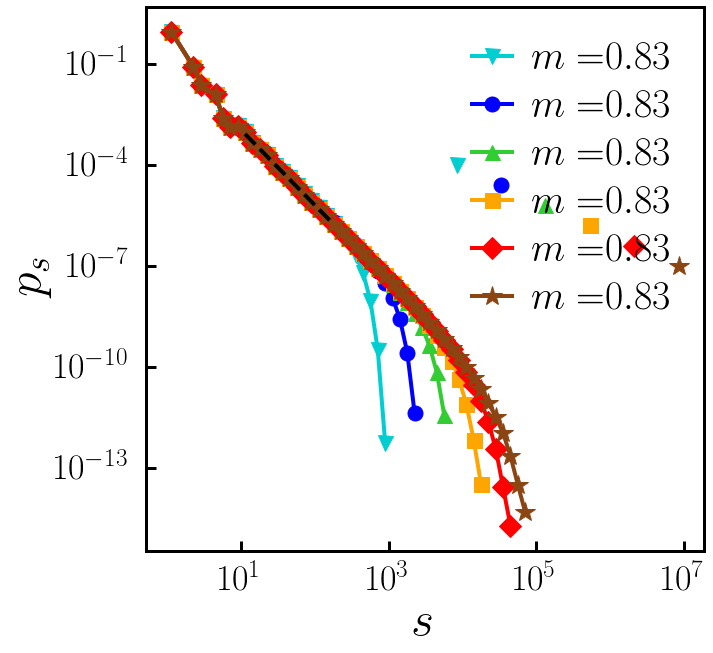

In [5]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 20000
acceptanceThreshold = 0.5
op = 0.83
fitRange = clusterSizeDist_fitRange[networkSize, acceptanceThreshold]

# default plot
networkSize = 10000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 40000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 160000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 640000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 2560000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0)
print(networkSize, tau, residual[0])

networkSize = 10240000
cs, dist = clusterSizeDist[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0)
print(networkSize, tau, residual[0])

# log fit
ax.plot(fitX, fitY, 'k--')
# ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")

# save and show
plt.show()

0.8 -1.9750329289352588 0.026582466181971635
0.81 -1.9910758470446086 0.024185209922409495
0.82 -2.0197746850114924 0.0212272607984595
0.83 -2.063480091876165 0.017011562937132473
0.84 -2.130728701270609 0.014209560511042805
0.85 -2.2438091521104195 0.01617624889178265


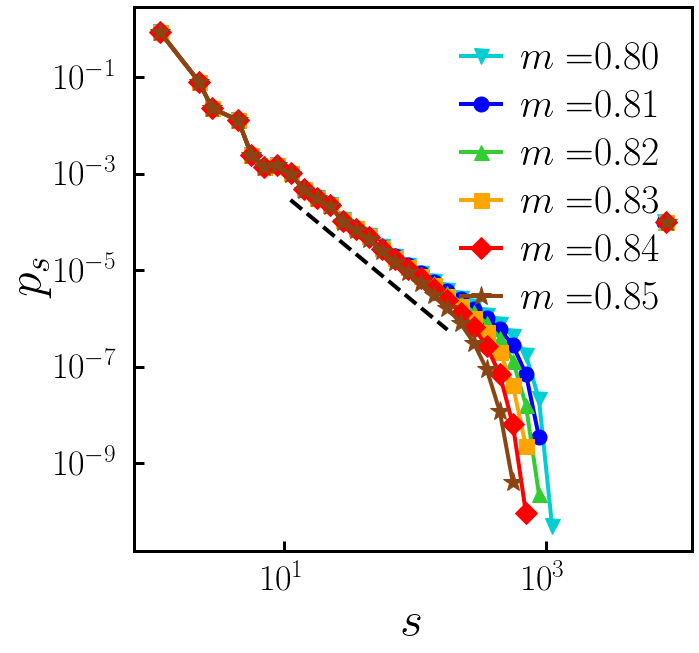

In [19]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10000
acceptanceThreshold = 0.5
fitRange = [7, 20]

# default plot
op = 0.8
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

op = 0.81
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

op = 0.82
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

op = 0.83
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

op = 0.84
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

op = 0.85
cs, dist = clusterSizeDist_exact[networkSize, acceptanceThreshold, op]
ax.plot(cs, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(op, tau, residual[0])

# log fit
# fitX, fitY, tau, residual = logFit(cs[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
# ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")

# save and show
plt.show()

# Cluster Size Distribution according to time

0.935 -1.7942710984803858 0.05656082538894426
0.936 -1.9080902857478215 0.04858978524063227
0.937 -2.029680593706437 0.04114883932807939
0.938 -2.160673315768459 0.034311867105795
0.939 -2.3028038386361747 0.02823672196481518
0.94 -2.45791359348717 0.022938113248747272


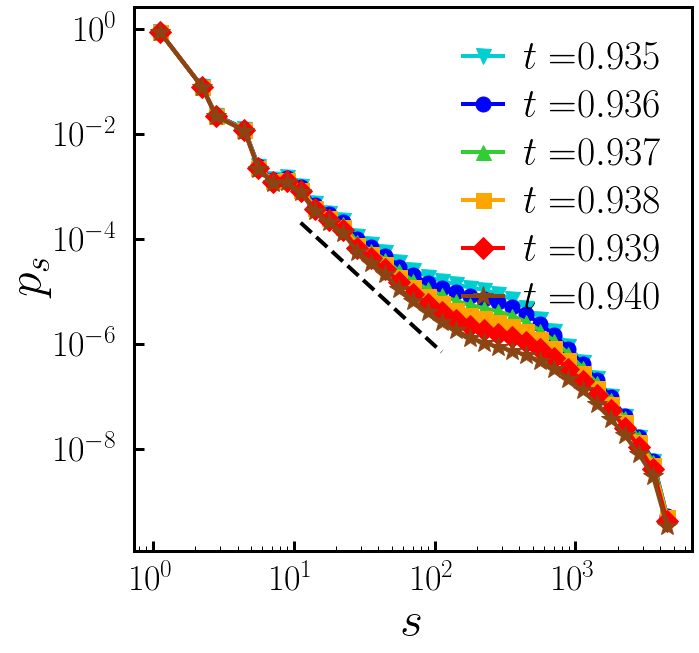

In [27]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 10000
acceptanceThreshold = 0.5
fitRange = [7, 18]

# default plot
t = 0.935
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='v', color='darkturquoise', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

t = 0.936
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='o', color='blue', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

t = 0.937
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='^', color='limegreen', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

t = 0.938
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='s', color='orange', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

t = 0.939
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='D', color='red', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

t = 0.94
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("t=")+latexFloat(t,3))
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(t, tau, residual[0])

# log fit
# fitX, fitY, tau, residual = logFit(cs[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
# ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")

# save and show
plt.show()

# Cluster Size Distribution according to time, different N

10000 -2.848611454133508 0.0010526814245969583
40000 -2.627762919296522 0.0611162968773811
160000 -2.656310321531199 0.3188286864323887
640000 -2.74581906516905 0.7118212840912767
2560000 -2.784396123619403 0.9989156806867723
10240000 -2.76826361538807 0.9709366138085767


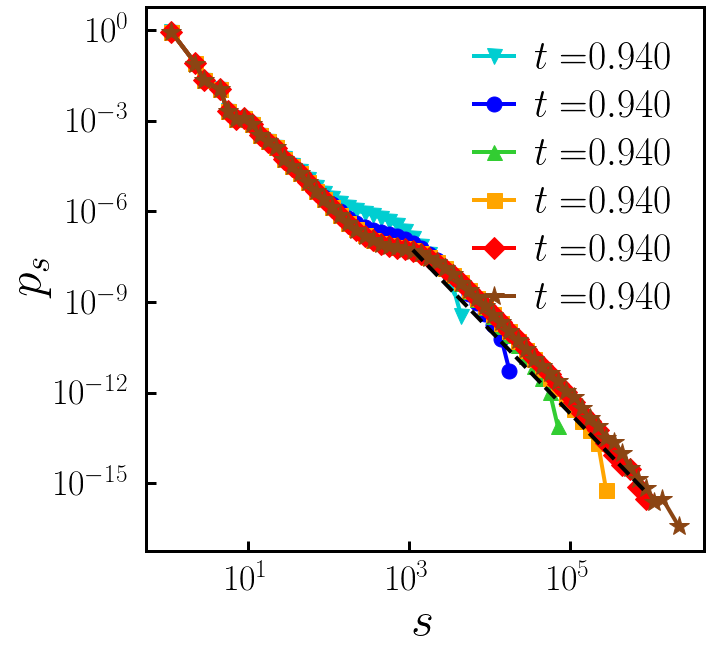

In [32]:
_, ax = plt.subplots(figsize=(10,10))

acceptanceThreshold = 0.5
fitRange = [27, -3]
t = 0.94

# default plot
networkSize = 10000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='v', color='darkturquoise', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 40000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='o', color='blue', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 160000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='^', color='limegreen', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 640000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='s', color='orange', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 2560000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='D', color='red', label=latexString("t=")+latexFloat(t,3))
_,_,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

networkSize = 10240000
cs, dist = clusterSizeDist_time[networkSize, acceptanceThreshold, t]
ax.plot(cs, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("t=")+latexFloat(t,3))
fitX,fitY,tau, residual = logFit(cs[fitRange[0]:fitRange[1]], dist[fitRange[0]:fitRange[1]], offset=0.5)
print(networkSize, tau, residual[0])

# log fit
# fitX, fitY, tau, residual = logFit(cs[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
# ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")

# save and show
plt.show()

# -----------------------------------------------------------

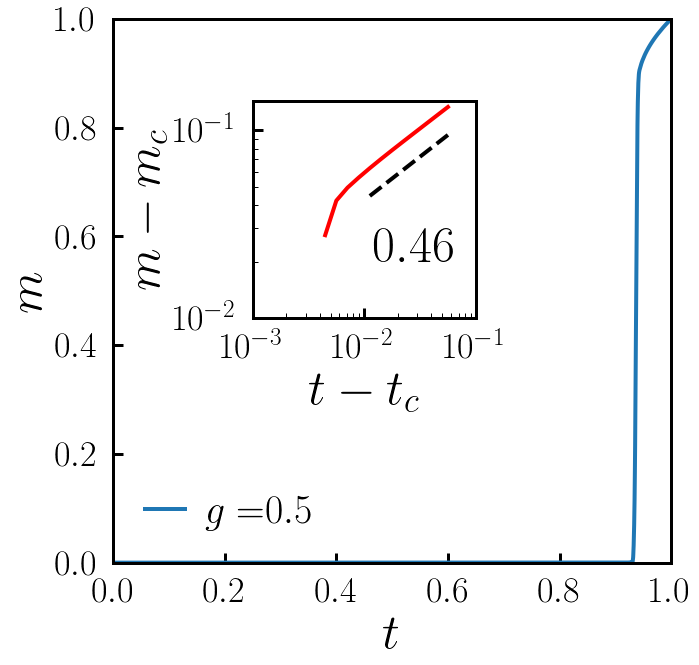

In [3]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# plot default
ax.plot(time, orderParameter[networkSize, acceptanceThreshold], label=latexString("g=")+latexFloat(0.5,1))

# default setting
xtick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ytick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexFloat(ytick,1))
ax.set_xlim(xtick[0], xtick[-1])
ax.set_ylim(ytick[0], ytick[-1])
ax.legend(loc='lower left')
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("m"))

# inset data
reducedT = logBinOrderParameter[networkSize, acceptanceThreshold][0]
op = logBinOrderParameter[networkSize, acceptanceThreshold][1]
mask = op>=0
reducedT = reducedT[mask]
op = op[mask]

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25,0.45,1,1), bbox_transform=ax.transAxes, loc='lower left', borderpad=0.0)
ax1.plot(reducedT, op, color='red')

# inset log fitting
fitX, fitY, beta, residual = logFit(reducedT[4:], op[4:], offset=0.15)
ax1.plot(fitX, fitY, 'k--')
ax1.text(1.2e-2,2e-2, latexFloat(beta,2))

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t-t_c"))
ax1.set_ylabel(latexString("m-m_c"))
xtick = [1e-3,1e-2,1e-1]
ytick = [1e-2,1e-1]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
ax1.set_xlim([1e-3,1e-1])
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1), np.arange(10,100,10)))
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("test")
# plt.savefig("test.png")
plt.show()


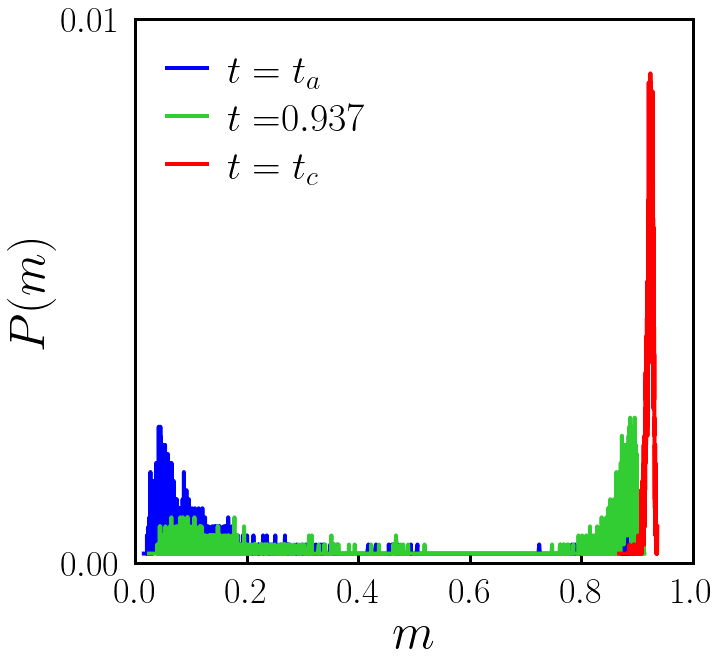

In [4]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
t = 0.932
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="blue", label=latexString("t=t_a"))

t = 0.937
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="limegreen", label=latexString("t=")+latexFloat(t))

t = 0.9482
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="red", label=latexString("t=t_c"))

# default setting
ax.legend(loc="upper left")
ax.set_xlabel(latexString("m"))
ax.set_ylabel(latexString("P(m)"))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 0.01])
xtick = np.linspace(0.0, 1.0, 6)
ytick = [0,0.01]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticklabels(list_latexFloat(ytick,2))

# save and show
plt.show()

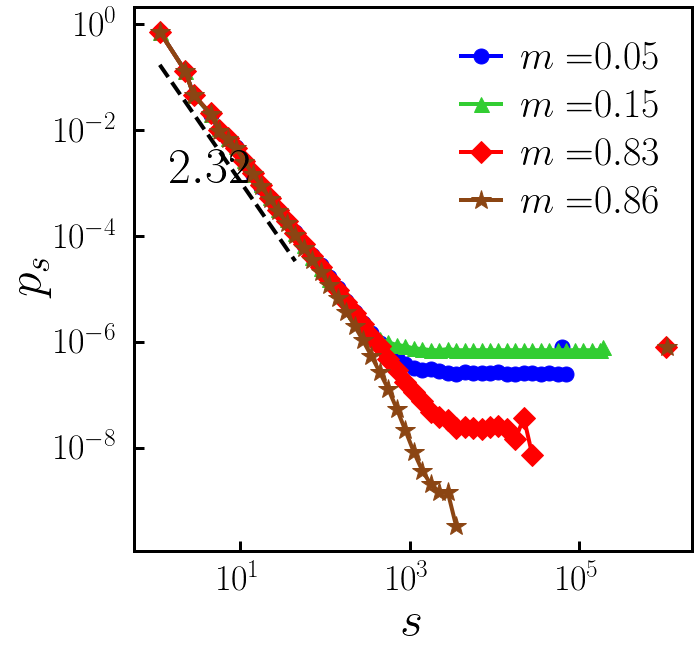

In [14]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# default plot
# op = 0.01
# clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
# ax.plot(clusterSize, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2))
# ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')

op = 0.05
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')

op = 0.15
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')

# op = 0.8
# clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
# ax.plot(clusterSize, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2))
# ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')

op = 0.8254
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')

# log fit
fitX, fitY, tau, residual = logFit(clusterSize[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5,1e-3, latexFloat(-1*tau,2), fontsize=50)

op = 0.86
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")
# ax.set_xlim([1,1e4])
# ax.set_ylim([1e-6,1])
# xtick = [1e0, 1e1, 1e2, 1e3, 1e4]
# ytick = [1e-6, 1e-4, 1e-2, 1]
# ax.set_xticks(xtick)
# ax.set_yticks(ytick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.yaxis.set_minor_locator(minortick_y)
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

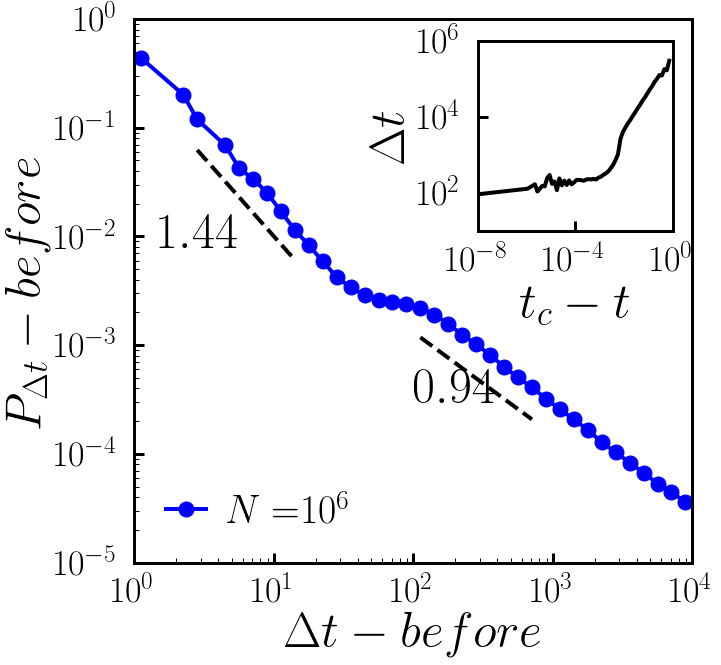

In [17]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_before[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_before[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[2:9], dist[2:9], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5, 8e-3, latexFloat(-1*alpha,2), fontsize=50)
fitX, fitY, alpha, residual = logFit(iet[17:26], dist[17:26], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 3e-4, latexFloat(-1*alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t-before"))
ax.set_ylabel(latexString("P_{\Delta t}-before"))
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-5,1e0])
xtick = np.power(10.0, np.linspace(0,4,5))
ytick = np.power(10.0, np.linspace(-5,0,6))
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="35%", height="35%", loc='lower left', bbox_to_anchor=(0.615, 0.61, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = interEventTime[networkSize, acceptanceThreshold][0]
iet = interEventTime[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, iet, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t_c-t"))
ax1.set_ylabel(latexString("\Delta t"))
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e1,1e6])
xtick = [1e-8,1e-4,1e0]
ytick = [1e2,1e4,1e6]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.yaxis.set_minor_locator(minortick_y)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()


In [27]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_during[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_during[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[5:15], dist[5:15], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(2e1, 1e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t-during"))
ax.set_ylabel(latexString("P_{\Delta t-during}"))
ax.set_xlim([1e0,1e3])
ax.set_ylim([1e-7,1e0])
xtick = [1e0,1e1,1e2,1e3]
ytick = [1e-7,1e-5,1e-3,1e-1]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))

# save and show
plt.show()

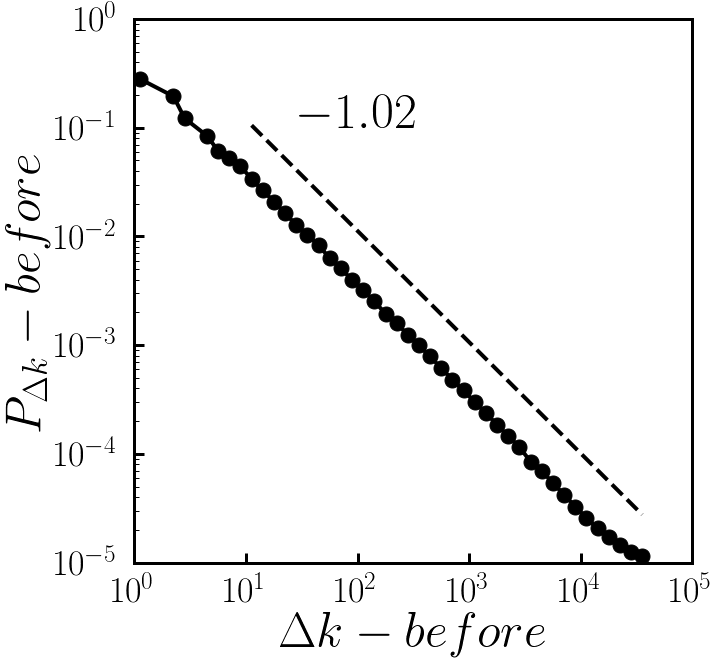

In [33]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, dist = deltaUpperBoundDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[7:], dist[7:], offset=-0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(3e1, 1e-1, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k-before"))
ax.set_ylabel(latexString("P_{\Delta k}-before"))
ax.set_xlim([1e0, 1e5])
ax.set_ylim([1e-5, 1e0])
xtick = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
ytick = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

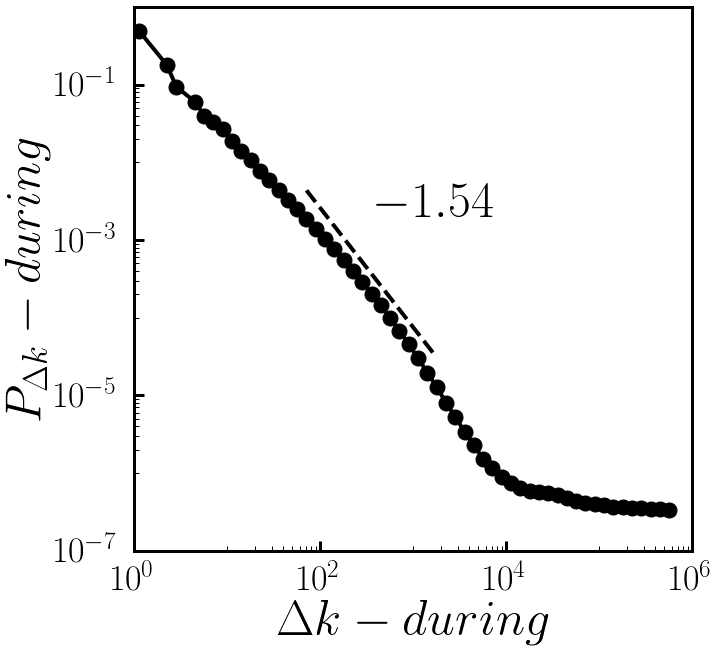

In [43]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, dist = deltaUpperBoundDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[15:30], dist[15:30], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e2, 2e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k-during"))
ax.set_ylabel(latexString("P_{\Delta k}-during"))
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-7,1e0])
xtick = [1e0,1e2,1e4,1e6]
ytick = [1e-7,1e-5,1e-3,1e-1]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

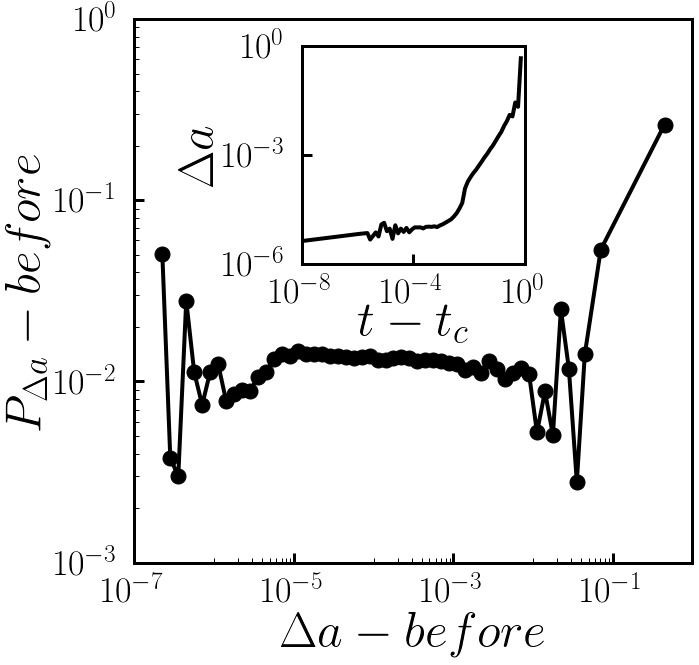

In [51]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta a-before"))
ax.set_ylabel(latexString("P_{\Delta a}-before"))
ax.set_xlim([1e-7, 1e0])
ax.set_ylim([1e-3, 1e0])
xtick = [1e-7, 1e-5, 1e-3, 1e-1]
ytick = [1e-3, 1e-2, 1e-1, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.3, 0.55, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = deltaAcceptance[networkSize, acceptanceThreshold][0]
delA = deltaAcceptance[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, delA, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t-t_c"), labelpad=-10)
ax1.set_ylabel(latexString("\Delta a"), labelpad=0)
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e-6,1e0])
xtick = [1e-8,1e-4,1e0]
ytick = [1e-6,1e-3,1e0]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e3, subs=np.arange(100,1000,100))
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

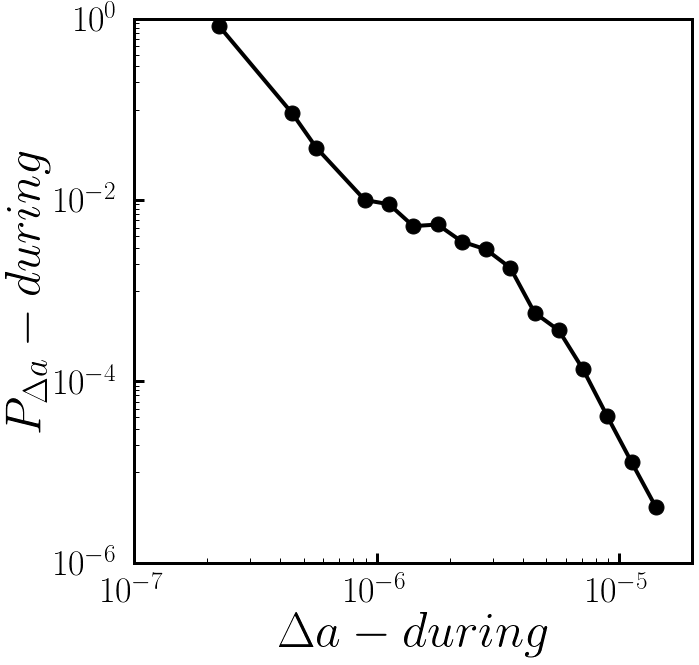

In [60]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta a-during"))
ax.set_ylabel(latexString("P_{\Delta a}-during"))
ax.set_xlim([1e-7, 2e-5])
ax.set_ylim([1e-6, 1e0])
xtick = [1e-7, 1e-6, 1e-5]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

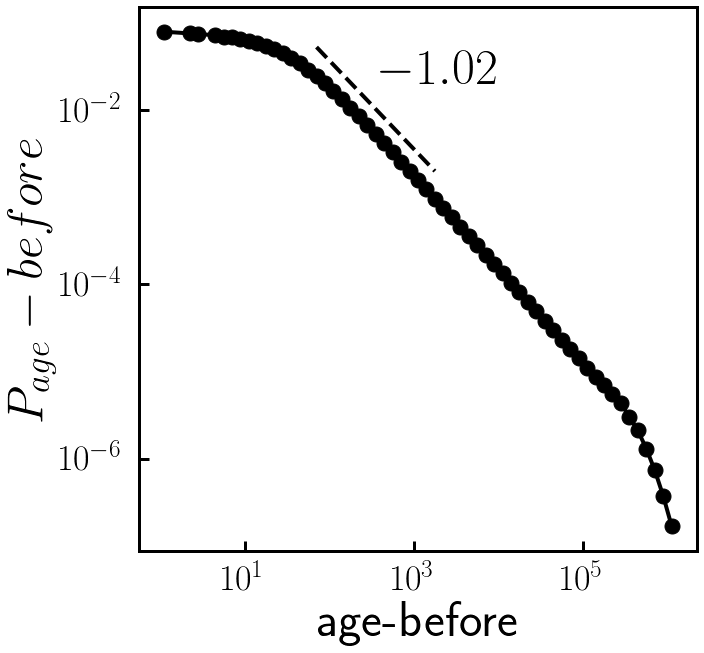

In [16]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
age, dist = ageDistribution_before[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[15:30], dist[15:30], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e2, 2e-2, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("age-before")
ax.set_ylabel(r"$P_{age}-before$")
# ax.set_xlim([1e0,1e4])
# ax.set_ylim([1e-5,1e-1])
# xtick = [1e0,1e2,1e4]
# ytick = [1e-5,1e-3,1e-1]
# ax.set_xticks(xtick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticks(ytick)
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(100,1000,100))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.yaxis.set_minor_locator(minortick_y)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



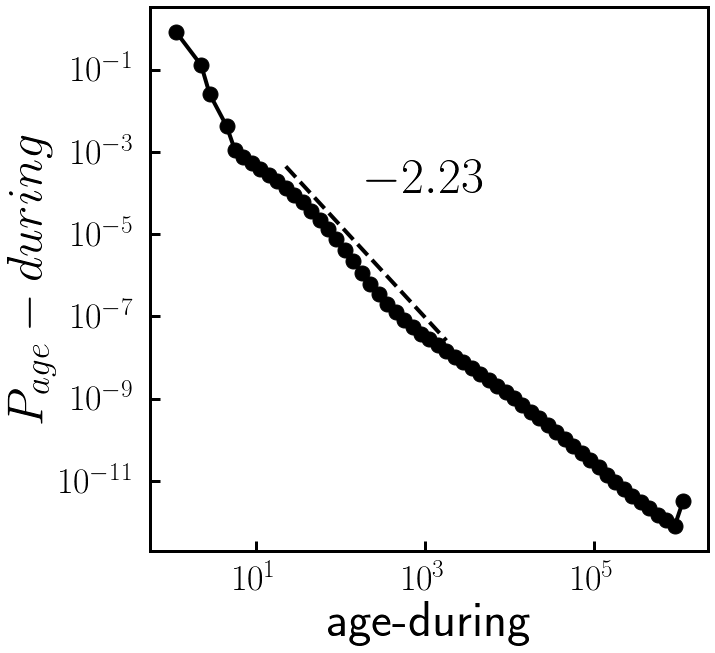

In [18]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
age, dist = ageDistribution_during[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[10:30], dist[10:30], offset=-0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(2e2, 1e-4, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("age-during")
ax.set_ylabel(r"$P_{age}-during$")
# ax.set_xlim([1e0,1e4])
# ax.set_ylim([1e-8,1e0])
# xtick = [1e0,1e2,1e4]
# ytick = [1e-8,1e-6,1e-4,1e-2,1e0]
# ax.set_xticks(xtick)
# ax.set_xticklabels(list_latexSci(xtick))
# ax.set_yticks(ytick)
# ax.set_yticklabels(list_latexSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.yaxis.set_minor_locator(minortick_y)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



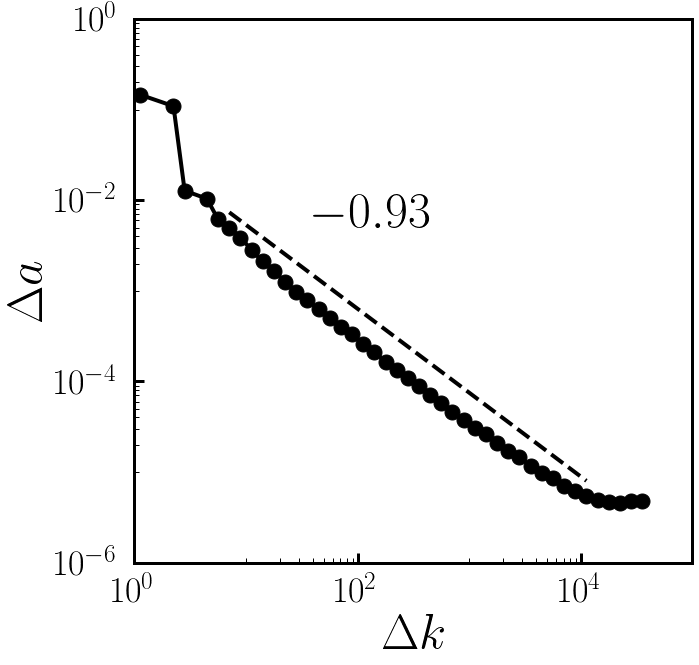

In [68]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delK, delA = deltaUpperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(delK, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(delK[5:-5], delA[5:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta k"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0,1e5])
ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

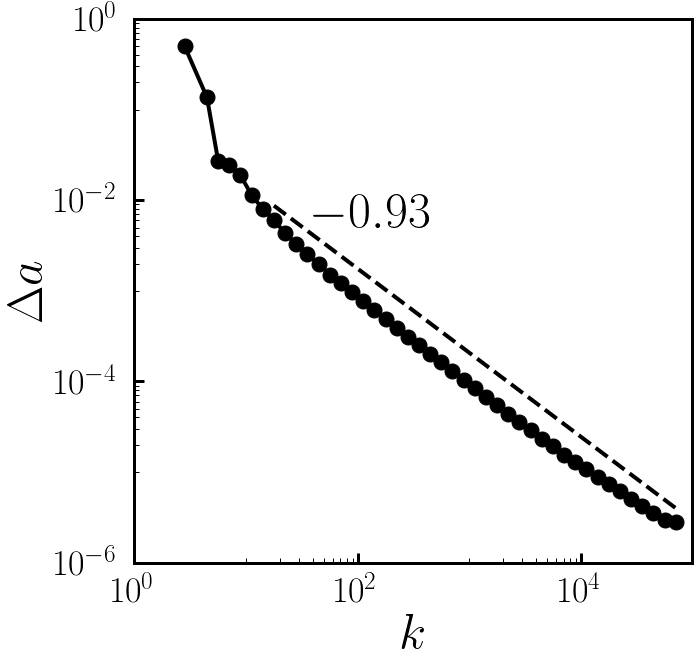

In [71]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
k, delA = upperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(k, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(k[7:], delA[7:], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("k"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0,1e5])
ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

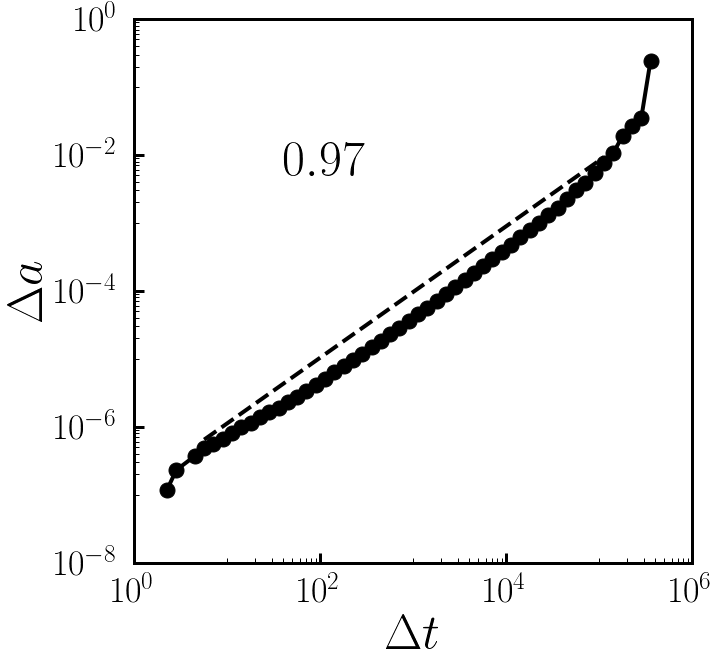

In [75]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet, delA = interEventTime_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(iet, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(iet[3:-5], delA[3:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexString("\Delta t"))
ax.set_ylabel(latexString("\Delta a"))
ax.set_xlim([1e0, 1e6])
ax.set_ylim([1e-8, 1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

# Dynamics

In [23]:
networkSize = 10000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_before[networkSize, acceptanceThreshold]

index = []
upperBound = []
i = 1
while len(index) < 7:
    if PL[i] == 1:
        index.append(i-1)
        upperBound.append(K[i-1])
    i += 1
# print(index)
# print(upperBound)

startIndex = index[2]-1
endIndex = index[-1]
A = t/U
PA = PL/PU
L = t/networkSize
l = L[startIndex:endIndex]
u = U[startIndex:endIndex]/networkSize
a = A[startIndex:endIndex]
k = K[startIndex:endIndex]



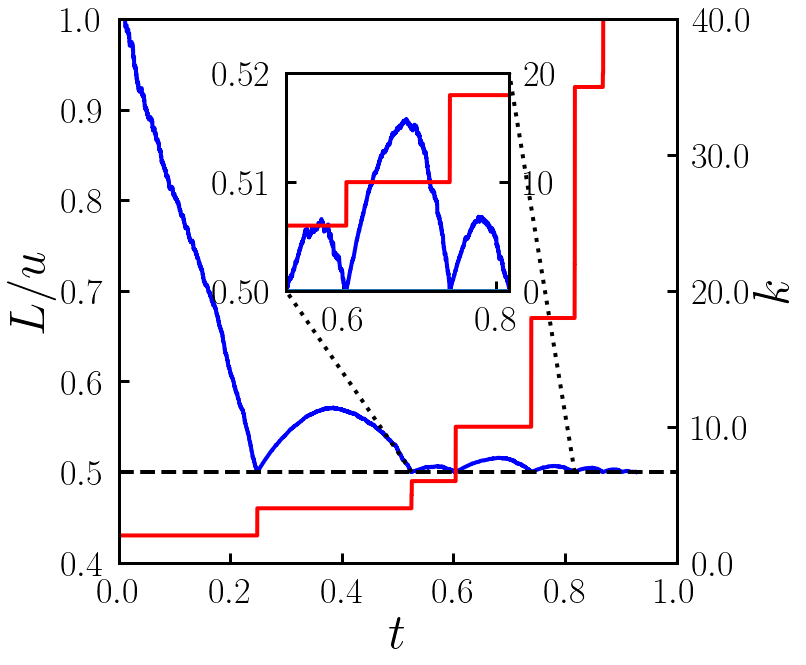

In [4]:
_, ax = plt.subplots()

inset_x = 0.3
inset_y = 0.5

# default plot
ax.plot(L, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L/u"))
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
xtick = np.linspace(0, 1, 6)
ytick = np.linspace(0.4, 1, 7)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 1))
ax.set_yticklabels(list_latexFloat(ytick, 1))

# zoom line
inset_x = 0.3
inset_y = 0.5
ax.plot([L[startIndex], inset_x], [0.5, (acceptanceThreshold+0.9)*inset_y], 'k:')
ax.plot([L[endIndex], inset_x+0.4], [0.5, (acceptanceThreshold+0.9)*inset_y+(1.1-acceptanceThreshold)*0.4], 'k:')

# twin plot
ax1 = ax.twinx()
ax1.plot(L, K, color='red')

# twin setting
ax1.set_ylabel(latexString("k"))
ax1.set_ylim([0,40])
ytick = np.linspace(0,40,5)
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexFloat(ytick, 0))

# inset plot
ax2 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(inset_x, inset_y, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
ax2.plot(l, a, color='blue')
ax2.plot([l[0], l[-1]], [acceptanceThreshold, acceptanceThreshold])

# inset settting
ax2.set_xlim([l[0], l[-1]])
ax2.set_ylim([acceptanceThreshold, acceptanceThreshold+0.02])
xtick = [0.6,0.8]
ytick = [0.5,0.51,0.52]
ax2.set_xticks(xtick)
ax2.set_yticks(ytick)
ax2.set_xticklabels(list_latexFloat(xtick, 1))
ax2.set_yticklabels(list_latexFloat(ytick, 2))

# inset twin plot
ax3 = ax2.twinx()
ax3.plot(l, k, color='red')

# inset twin setting
ytick = [0,10,20]
ax3.set_yticks(ytick)
ax3.set_yticklabels(list_latexFloat(ytick, 0))

# save and show
plt.show()

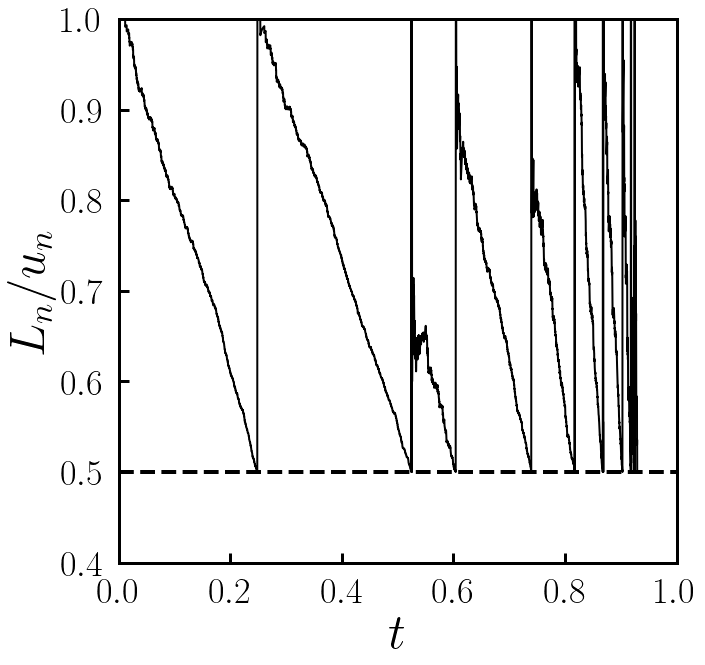

In [24]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L_n/u_n"))

# save and show
plt.show()

In [25]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

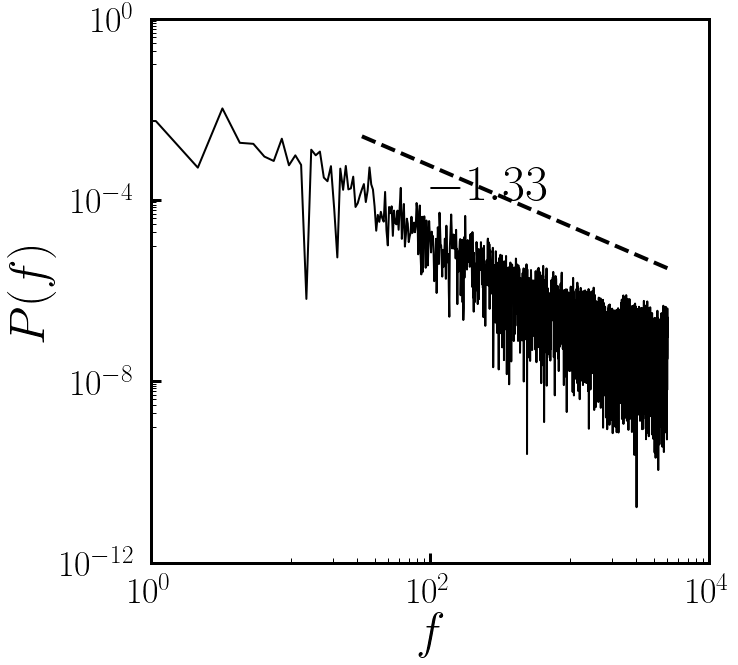

In [27]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[30:], power[30:], offset=-2)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 1e-4, latexFloat(alpha,2))

# main setting
ax.set_xlabel(latexString("f"))
ax.set_ylabel(latexString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-12,1e0])
xtick = [1e0,1e2,1e4]
ytick = [1e-12,1e-8,1e-4,1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticklabels(list_latexSci(ytick))

minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [8]:
networkSize = 10000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_during[networkSize, acceptanceThreshold]

A = t/U
PA = PL/PU
L = t/networkSize


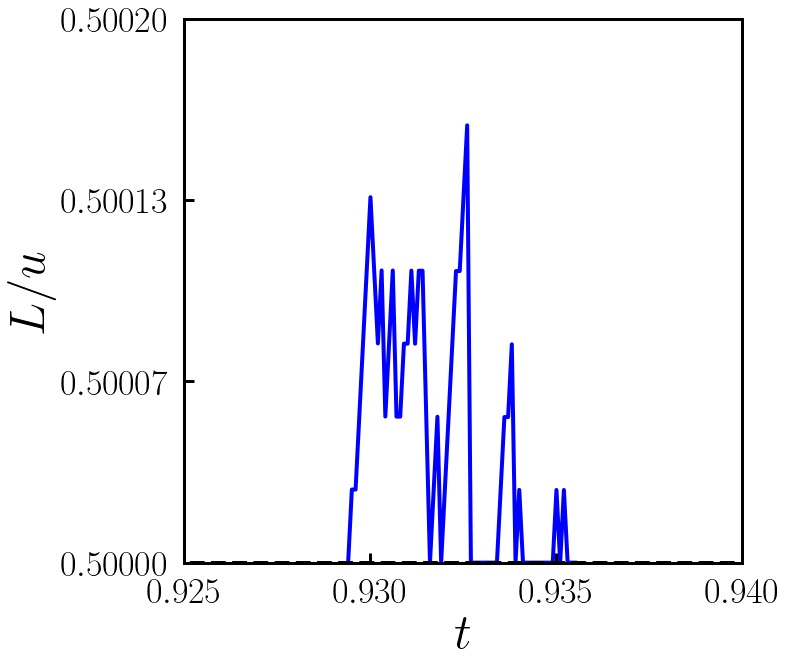

In [9]:
_, ax = plt.subplots()

# default plot
ax.plot(L, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L/u"))
ax.set_xlim([0.925,0.94])
ax.set_ylim([acceptanceThreshold, acceptanceThreshold+0.0002])
xtick = np.linspace(0.925, 0.940, 4)
ytick = np.linspace(acceptanceThreshold, acceptanceThreshold+0.0002, 4)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 3))
ax.set_yticklabels(list_latexFloat(ytick, 5))

# save and show
plt.show()

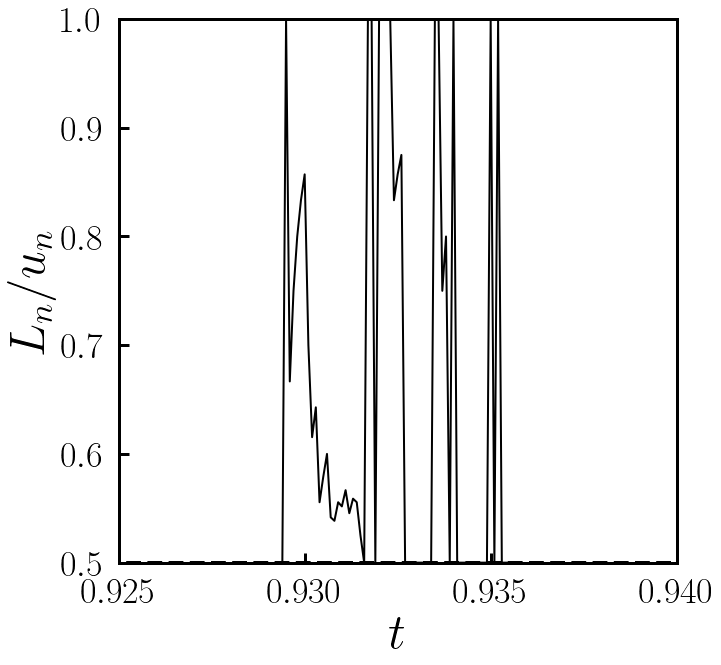

In [10]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim([0.925,0.94])
ax.set_ylim([acceptanceThreshold,1])
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L_n/u_n"))

# save and show
plt.show()

In [13]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

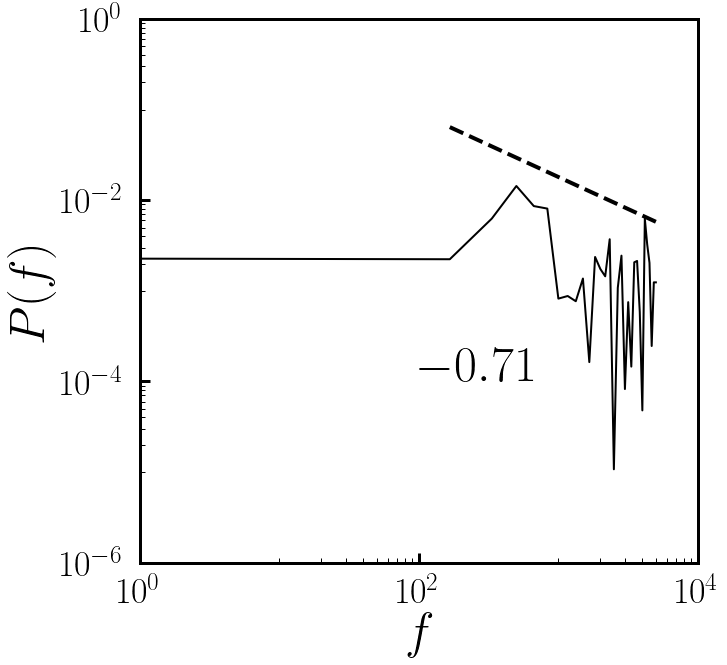

In [22]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[1:], power[1:], offset=-1)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 1e-4, latexFloat(alpha,2))

# main setting
ax.set_xlabel(latexString("f"))
ax.set_ylabel(latexString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-6,1e0])
xtick = [1e0,1e2,1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()